<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Machine Learning Methods: Naïve Bayes (Gaussian Exercise)</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---


### **Python Exercise: Naive Bayes (Gaussian - Machine Predictive Maintenance Classification)**

Gaussian Naive Bayes is ideal for predictive maintenance using continuous sensor readings like temperature, vibration levels, pressure, or RPM. For example, it learns that failing machines typically have vibration levels around 85±10 Hz and temperature around 95±5°C, while healthy machines show 45±8 Hz and 70±3°C, then classifies whether a machine needs maintenance based on where its current sensor readings fall within these distributions.

The Example Below shows the Machine Predictive Maintenance Classification Dataset from Kaggle.

#### **1) Dataset Information**

##### **Machine Predictive Maintenance Classification Dataset**

A synthetic dataset reflecting real industrial predictive maintenance scenarios with **10,000 data points** and **14 features**.

| Feature | Description | Details |
|---------|-------------|---------|
| **UID** | Unique identifier | Range: 1 to 10,000 |
| **Product ID** | Product quality variant + serial number | L (Low - 50%), M (Medium - 30%), H (High - 20%) |
| **Air Temperature [K]** | Ambient temperature | Random walk, σ = 2K, centered at 300K |
| **Process Temperature [K]** | Operating temperature | Air temp + 10K, σ = 1K |
| **Rotational Speed [rpm]** | Shaft rotation speed | Calculated from 2860W power with noise |
| **Torque [Nm]** | Applied torque | Normal distribution: μ = 40Nm, σ = 10Nm (no negatives) |
| **Tool Wear [min]** | Cumulative tool usage | H/M/L variants add 5/3/2 minutes respectively |

##### **Targets**

| Target | Description |
|--------|-------------|
| **Target** | Binary: Failure or Not |
| **Failure Type** | Categorical: Type of failure |

**Critical Warning**: Both are targets so **do not use one as a feature** to avoid data leakage!

**Data leakage** occurs when information from outside the training dataset (or from the target itself) is used to create the model, artificially inflating performance. The model appears highly accurate during training/testing but fails in real-world deployment because the leaked information isn't available when making actual predictions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn.preprocessing     # Preparing & Transforming Data before Training
import sklearn.model_selection   # Splitting & Validating Dataset
import sklearn.naive_bayes       # Naive Bayes Classification Algorithm
import sklearn.metrics           # Evaluating Model Metrics

# Load the Dataset Downloaded from Kaggle: Machine Predictive Maintenance Classification
# Link: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
file_path = os.path.join("resources","datasets","predictive_maintenance.csv")

# Create Data Frame to Store the CSV Data
pred_maint_df = pd.read_csv(file_path)

# Print the Dataset Information
print(f"Dataset Shape: {pred_maint_df.shape}")
print(f"Columns: {pred_maint_df.columns.to_list()}")
print(f"\nFirst 5 Rows of Data:")
display(pred_maint_df.head())

# Data Set Information
total_num_of_data = len(pred_maint_df)
print(f"\nTotal Number of Records: {total_num_of_data}")

Dataset Shape: (10000, 10)
Columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']

First 5 Rows of Data:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure



Total Number of Records: 10000


#### **2) Explore the Dataset**

Target Distribution (Binary Failure):


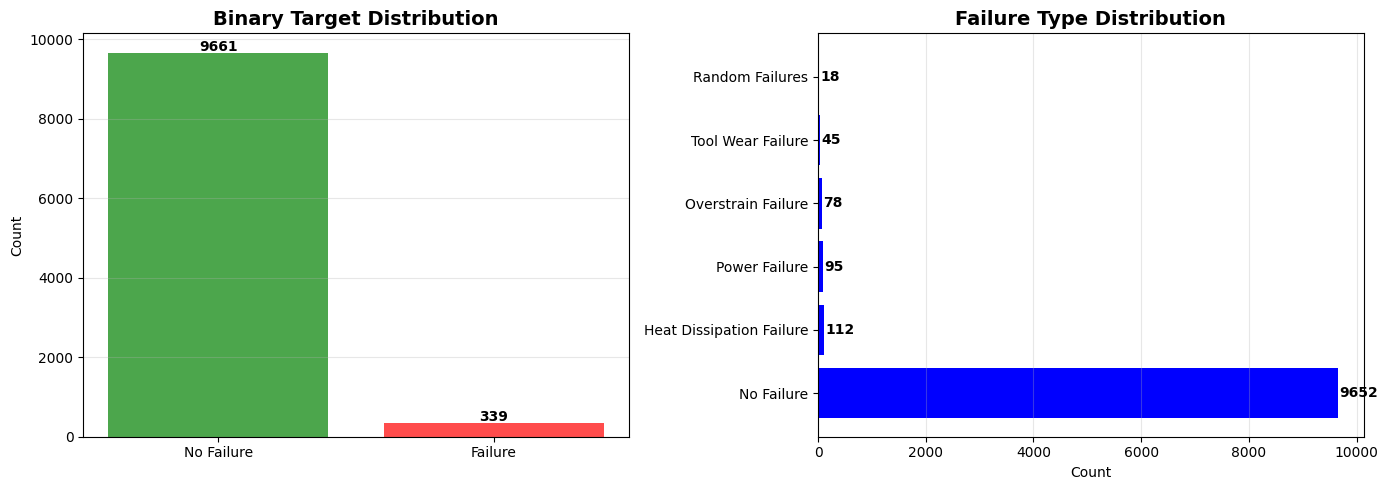

In [14]:
# Target Distribution (Count the Number of '0' - No Failures and '1' - Failures)
print("Target Distribution (Binary Failure):")
target_distribution_df = pred_maint_df['Target'].value_counts()
failure_type_distribution = pred_maint_df['Failure Type'].value_counts()
failure_rate = pred_maint_df['Target'].mean() * 100

# Create a Plot
figure, axes = plt.subplots(1, 2, figsize = (14, 5))

# Binary Target Distribution Plot
axes[0].bar(['No Failure', 'Failure'], target_distribution_df.values, color = ['green', 'red'], alpha = 0.7)
axes[0].set_title('Binary Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)
for i, j in enumerate(target_distribution_df.values):
    axes[0].text(i, j + 50, str(j), ha='center', fontweight='bold')

# Failure Types Distribuion Plot
axes[1].barh(failure_type_distribution.index, failure_type_distribution.values, color='blue')
axes[1].set_title('Failure Type Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count')
axes[1].grid(axis='x', alpha=0.3)
for i, j in enumerate(failure_type_distribution.values):
    axes[1].text(j + 20, i, str(j), va='center', fontweight='bold')

plt.tight_layout()
plt.show()